<a href="https://colab.research.google.com/github/jgraving/deepposekit/blob/master/examples/step4b_predict_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DeepPoseKit Step 4 - Predict on new data

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

from deepposekit.models import load_model
from deepposekit.io import DataGenerator, VideoReader, VideoWriter
from deepposekit.io.utils import merge_new_images

import tqdm
import time

from scipy.signal import find_peaks

from os.path import expanduser

c:\users\islam\anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\islam\anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\islam\anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\islam\anaconda3\envs\keras\lib\site-packages\tensorflow\python\f

Use the next cell to download the example data into your home directory

Find the saved models

In [2]:
models = sorted(glob.glob('deepposekit-data/datasets/horse/models/*model*.h5'))
models

['deepposekit-data/datasets/horse/models\\model_densenet_01_67.799222.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_02_63.048424.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_03_62.339646.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_07_48.178533.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_07_58.845908.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_10_57.919422.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_11_46.580921.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_11_57.426869.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_127_25.256987.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_137_25.220035.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_13_44.670796.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_145_24.557976.h5',
 'deepposekit-data/datasets/horse/models\\model_densenet_16_52.383229.h5',
 'deepposekit-data/dat

# Load the trained model

This loads the trained model into memory for making predictions

In [3]:
model = load_model('deepposekit-data/datasets/horse/models/model_densenet_145_24.557976.h5')

W0101 17:02:02.551125  6920 deprecation.py:506] From c:\users\islam\anaconda3\envs\keras\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0101 17:02:02.552092  6920 deprecation.py:506] From c:\users\islam\anaconda3\envs\keras\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0101 17:02:02.553089  6920 deprecation.py:506] From c:\users\islam\anaconda3\envs\keras\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init

Find the available videos

In [4]:
videos = sorted(glob.glob('deepposekit-data/datasets/horse/*video*.mp4'))
videos

['deepposekit-data/datasets/horse\\prediction_on_video_0.mp4',
 'deepposekit-data/datasets/horse\\resized_video_3_1.mp4',
 'deepposekit-data/datasets/horse\\video_1.mp4',
 'deepposekit-data/datasets/horse\\video_1_1.mp4',
 'deepposekit-data/datasets/horse\\video_2.mp4',
 'deepposekit-data/datasets/horse\\video_3.mp4',
 'deepposekit-data/datasets/horse\\video_3_1.mp4']

# Test the video

Check to make sure `VideoReader` is correctly loading the video frames

In [5]:
reader = VideoReader('deepposekit-data/datasets/horse/resized_video_3_1.mp4', batch_size=10, gray=True)
frames = reader[0]
print(frames.shape)
reader.close()

(10, 320, 640, 1)


True

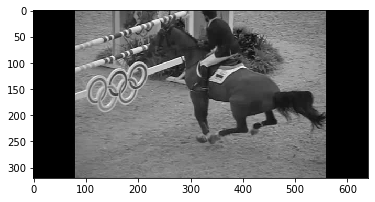

In [6]:
plt.imshow(frames[0,...,0], cmap='gray')
plt.show()

# Create new video with resized frames

In [6]:
'''
import cv2

resized_shape = (640, 320) 

cap = cv2.VideoCapture('deepposekit-data/datasets/horse/video_3_1.mp4')
 
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('deepposekit-data/datasets/horse/resized_video_3_1.mp4',fourcc, 30, resized_shape)
 
while True:
    ret, frame = cap.read()
    if ret == True:
        b = cv2.resize(frame,resized_shape, fx=0, fy=0, interpolation = cv2.INTER_CUBIC)
        out.write(b)
    else:
        break
    
cap.release()
out.release()
cv2.destroyAllWindows()  
print("Done!")



'''

Done!


'\nfor frame in zip(reader):\n\n    frame = frame[0]\n    if(frame is not None) :\n        frame = frame.copy()\n        frame = np.squeeze(frame, axis=0)\n        frame = cv2.resize(frame, resized_shape)  \n        writer.write(frame)\n\n\nreader.close()\n'

# Makes predictions for the full video

This loads batches of frames and makes predictions.

In [7]:
reader = VideoReader('deepposekit-data/datasets/horse/resized_video_3_1.mp4', batch_size=2, gray=True)
predictions = model.predict(reader, verbose=1)
reader.close()


1661/1661 [==============================] - 110s 67ms/step


True

# Save the data

Once you have your predictions you can save it however you wish. Here is an example using numpy.save

In [8]:
np.save('deepposekit-data/datasets/horse/predictions.npy', predictions)
print(predictions)

[[[5.2528003e+02 1.5960001e+02 1.6151305e-02]
  [3.0712000e+02 7.7279999e+01 1.0852255e-02]
  [3.0776001e+02 8.0080002e+01 3.4184560e-01]
  ...
  [3.2935999e+02 2.3232001e+02 6.1508852e-01]
  [3.1960001e+02 1.9975999e+02 4.6755695e-01]
  [3.9728000e+02 1.8320000e+02 3.8172448e-01]]

 [[5.2288000e+02 1.5967999e+02 1.8389042e-02]
  [3.0535999e+02 7.8160004e+01 1.2783972e-02]
  [3.0479999e+02 7.7840004e+01 2.5827214e-01]
  ...
  [3.2672000e+02 2.3023999e+02 6.9952846e-01]
  [3.9576001e+02 2.2712000e+02 3.4185600e-01]
  [3.9479999e+02 1.8248000e+02 4.0443647e-01]]

 [[5.1991998e+02 1.5975999e+02 2.2845156e-02]
  [2.7151999e+02 4.0560005e+01 2.1796143e-02]
  [3.0392001e+02 7.7520004e+01 2.7912652e-01]
  ...
  [3.2376001e+02 2.2695999e+02 4.6698108e-01]
  [3.8991998e+02 2.2656000e+02 4.1834047e-01]
  [3.9247998e+02 1.8208000e+02 3.8904756e-01]]

 ...

 [[5.1279999e+02 1.2264000e+02 7.6474136e-01]
  [4.9735999e+02 8.6880005e+01 9.0158868e-01]
  [4.4032001e+02 1.0832000e+02 6.1629653e-01]
  ..

This splits the predictions into their x-y coordinates, and confidence scores from each confidence map.

In [9]:
x, y, confidence = np.split(predictions, 3, -1)

Visualize the data output

C:\Users\islam\AppData\Roaming\Python\Python36\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


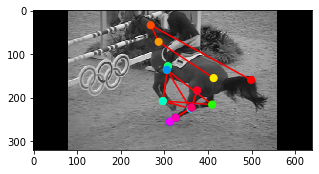

In [10]:
data_generator = DataGenerator('deepposekit-data/datasets/horse/annotation_data_release_modified.h5')

image = frames[9]
keypoints = predictions[9]

plt.figure(figsize=(5,5))
image = image if image.shape[-1] is 3 else image[..., 0]
cmap = None if image.shape[-1] is 3 else 'gray'
plt.imshow(image, cmap=cmap, interpolation='none')
for idx, jdx in enumerate(data_generator.graph):
    if jdx > -1:
        plt.plot(
            [keypoints[idx, 0], keypoints[jdx, 0]],
            [keypoints[idx, 1], keypoints[jdx, 1]],
            'r-'
        )
plt.scatter(keypoints[:, 0], keypoints[:, 1],
            c=np.arange(data_generator.keypoints_shape[0]),
            s=50, cmap=plt.cm.hsv, zorder=3)

plt.show()

# Detect outlier frames

This is a basic example of how to use confidence scores and temporal derivatives to detect potential outliers and add them to the annotation set.

Plot the confidence scores

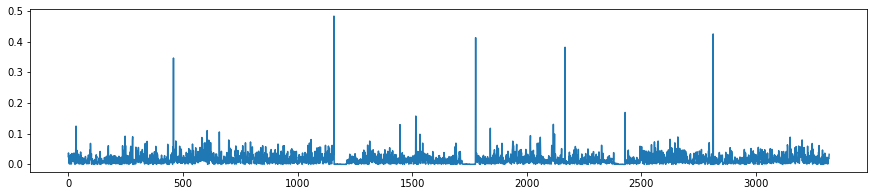

In [11]:
confidence_diff = np.abs(np.diff(confidence.mean(-1).mean(-1)))

plt.figure(figsize=(15, 3))
plt.plot(confidence_diff)
plt.show()

Use `scipy.signal.find_peaks` to detect outliers

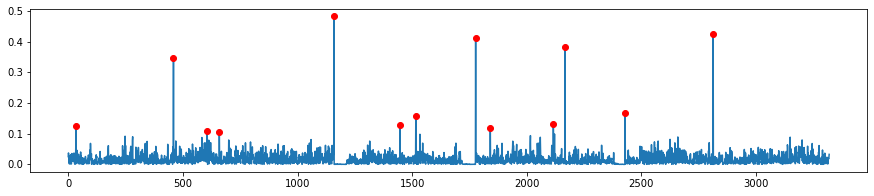

In [12]:
confidence_outlier_peaks = find_peaks(confidence_diff, height=0.1)[0]

plt.figure(figsize=(15, 3))
plt.plot(confidence_diff)
plt.plot(confidence_outlier_peaks, confidence_diff[confidence_outlier_peaks], 'ro')
plt.show()

Calculate the keypoint derivatives and plot them

In [13]:
time_diff = np.diff(predictions[..., :2], axis=0)
time_diff = np.abs(time_diff.reshape(time_diff.shape[0], -1))
time_diff = time_diff.mean(-1)
time_diff.shape

(3320,)

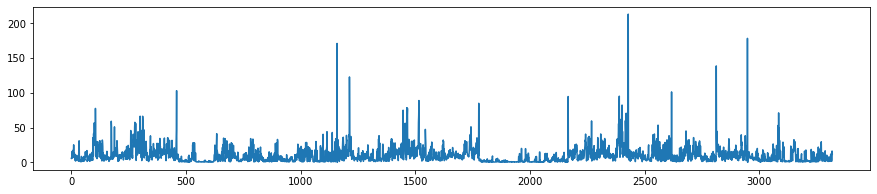

In [14]:
plt.figure(figsize=(15, 3))
plt.plot(time_diff)
plt.show()

Use `scipy.signal.find_peaks` to detect outliers

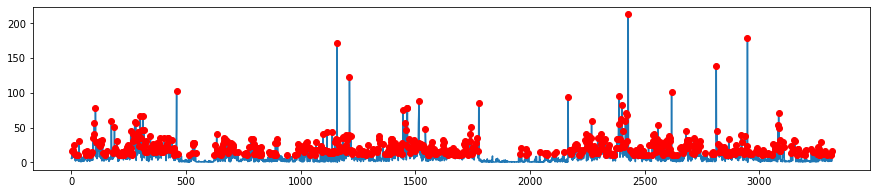

In [15]:
time_diff_outlier_peaks = find_peaks(time_diff, height=10)[0]

plt.figure(figsize=(15, 3))
plt.plot(time_diff)
plt.plot(time_diff_outlier_peaks, time_diff[time_diff_outlier_peaks], 'ro')
plt.show()

Combine the detected outliers into a single index

In [16]:
outlier_index = np.concatenate((confidence_outlier_peaks, time_diff_outlier_peaks))
outlier_index = np.unique(outlier_index) # make sure there are no repeats

Grab the frames and corresponding keypoints for the selected outliers

In [17]:
reader = VideoReader('deepposekit-data/datasets/horse/resized_video_3_1.mp4', batch_size=1, gray=True)

outlier_images = []
outlier_keypoints = []
for idx in outlier_index:
    outlier_images.append(reader[idx])
    outlier_keypoints.append(predictions[idx])

outlier_images = np.concatenate(outlier_images)
outlier_keypoints = np.stack(outlier_keypoints)

reader.close()

outlier_images.shape, outlier_keypoints.shape

((660, 320, 640, 1), (660, 20, 3))

Visualize the outlier frames and keypoint predictions

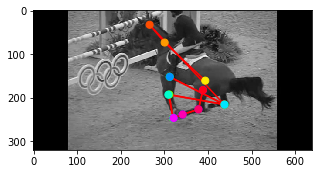

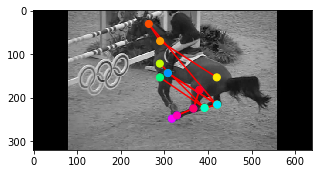

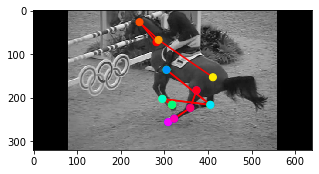

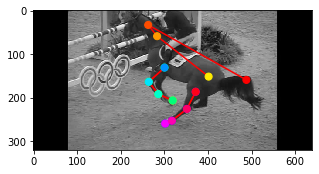

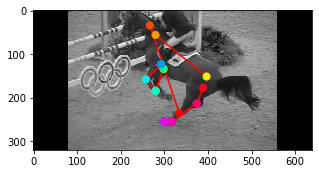

In [18]:
data_generator = DataGenerator('deepposekit-data/datasets/horse/annotation_data_release_modified.h5')

for idx in range(5):
    image = outlier_images[idx]
    keypoints = outlier_keypoints[idx]

    plt.figure(figsize=(5,5))
    image = image if image.shape[-1] is 3 else image[..., 0]
    cmap = None if image.shape[-1] is 3 else 'gray'
    plt.imshow(image, cmap=cmap, interpolation='none')
    for idx, jdx in enumerate(data_generator.graph):
        if jdx > -1:
            plt.plot(
                [keypoints[idx, 0], keypoints[jdx, 0]],
                [keypoints[idx, 1], keypoints[jdx, 1]],
                'r-'
            )
    plt.scatter(keypoints[:, 0], keypoints[:, 1],
                c=np.arange(data_generator.keypoints_shape[0]),
                s=50, cmap=plt.cm.hsv, zorder=3)

    plt.show()

# Merge outliers with the annotation set
Here we'll use a utility function `merge_new_images` to merge the outliers with our existing annotation set. You can then go annotate them with `deepposekit.annotate.Annotator`. Make sure to use the merged output file!

In [19]:

merge_new_images(
    datapath='deepposekit-data/datasets/horse/annotation_data_release_modified.h5',
    merged_datapath='deepposekit-data/datasets/horse/annotation_data_release_merged.h5',
    images=outlier_images,
    keypoints=outlier_keypoints,
    # overwrite=True # This overwrites the merged dataset if it already exists
)


Load the data with `DataGenerator` and check that the merged data are there

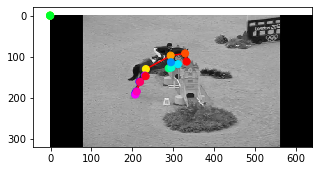

In [20]:

merged_generator = DataGenerator('deepposekit-data/datasets/horse/annotation_data_release_merged.h5', mode="unannotated")

image, keypoints = merged_generator[0]

plt.figure(figsize=(5,5))
image = image[0] if image.shape[-1] is 3 else image[0, ..., 0]
cmap = None if image.shape[-1] is 3 else 'gray'
plt.imshow(image, cmap=cmap, interpolation='none')
for idx, jdx in enumerate(data_generator.graph):
    if jdx > -1:
        plt.plot(
            [keypoints[0, idx, 0], keypoints[0, jdx, 0]],
            [keypoints[0, idx, 1], keypoints[0, jdx, 1]],
            'r-'
        )
plt.scatter(keypoints[0, :, 0], keypoints[0, :, 1], c=np.arange(data_generator.keypoints_shape[0]), s=50, cmap=plt.cm.hsv, zorder=3)

plt.show()


# Visualize the data as a video

This is an example of how to visualize the predicted posture data on the original video.

In [46]:
# TODO: Turn this into a function

data_generator = DataGenerator('deepposekit-data/datasets/horse/annotation_data_release_modified.h5')
print(predictions.shape)
predictions = predictions[...,:2]
print(predictions.shape)
#predictions *= 2

resized_shape = (640, 320)
cmap = plt.cm.hsv(np.linspace(0, 1, data_generator.keypoints_shape[0]))[:, :3][:, ::-1] * 255

writer = VideoWriter('deepposekit-data/datasets/horse/prediction_on_video.mp4', (640,320), 'MP4V', 30.0)
reader = VideoReader('deepposekit-data/datasets/horse/resized_video_3_1.mp4', batch_size=1)

for frame, keypoints in tqdm.tqdm(zip(reader, predictions)):
    frame = frame[0]
    frame = frame.copy()
    frame = cv2.resize(frame, resized_shape)
    for idx, node in enumerate(data_generator.graph):
        if node >= 0:
            pt1 = keypoints[idx]
            pt2 = keypoints[node]
            cv2.line(frame, (pt1[0], pt1[1]), (pt2[0], pt2[1]), (0,0,255), 2, cv2.LINE_AA)
    for idx, keypoint in enumerate(keypoints):
        keypoint = keypoint.astype(int)
        cv2.circle(frame, (keypoint[0], keypoint[1]), 5, tuple(cmap[idx]), -1, lineType=cv2.LINE_AA)
        
    writer.write(frame)

writer.close()
reader.close()

47it [00:00, 461.98it/s]

(3321, 20, 3)
(3321, 20, 2)


3321it [00:06, 527.51it/s]


True

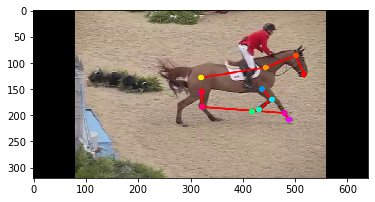

In [47]:
plt.imshow(frame[...,::-1])
plt.show()